# Instructions


1. Given previous weather forcast data implement a model to predict whether or not it will rain tomorrow. 
2. <b>Evaluate your results. cross-validate your results using CV algorithm of your choice with 10 folds </b> 

## Beat the Baseline of 50% to pass the lab. Anything above 65% gets you a full score.

# About The Dataset


This dataset contains observations of weather metrics for each day from 2008 to 2017. The dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RISK_MM       | Amount of rain tomorrow                               | Millimeters     | float  |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |



In [3]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, f1_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score

### Importing the Dataset


In [5]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv')


In [6]:

df.head(20)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
5,2/6/2008,20.2,27.2,1.6,2.6,8.6,W,41,W,ENE,...,69,62,1002.7,998.6,6,6,23.8,26.0,Yes,Yes
6,2/7/2008,18.6,26.3,6.2,5.2,5.2,W,41,W,S,...,75,80,999.0,1000.3,4,7,21.7,22.3,Yes,Yes
7,2/8/2008,17.2,22.3,27.6,5.8,2.1,W,41,S,SE,...,77,61,1008.3,1007.4,7,8,18.9,21.1,Yes,Yes
8,2/9/2008,16.4,20.8,12.6,4.8,3.0,W,41,SSW,W,...,92,91,1006.4,1007.6,7,7,17.1,16.5,Yes,Yes
9,2/10/2008,14.6,24.2,8.8,4.4,10.1,W,41,W,SSE,...,80,53,1014.0,1013.4,4,2,17.2,23.3,Yes,No


### Data Preprocessing


#### Transforming Categorical Variables


First, we need to convert categorical variables to binary variables. We will use pandas `get_dummies()` method for this.


In [7]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [8]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

Check for missing and duplicate values

In [9]:
df_sydney_processed.drop_duplicates(inplace=True)
df_sydney_processed.isna().sum()

Date              0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
                 ..
WindDir3pm_SSW    0
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
Length: 68, dtype: int64

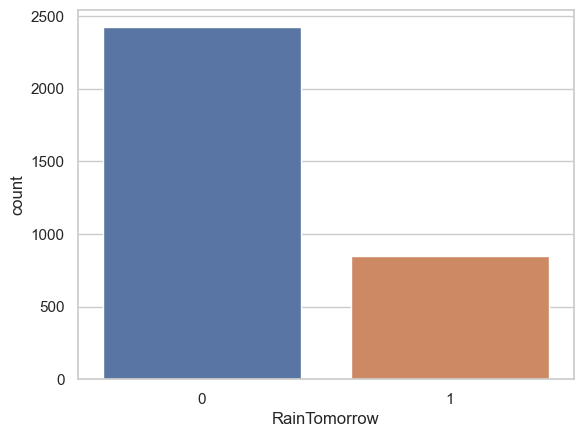

In [10]:
sns.set(style="whitegrid")
sns.countplot(df_sydney_processed.RainTomorrow)
plt.show()

<AxesSubplot:>

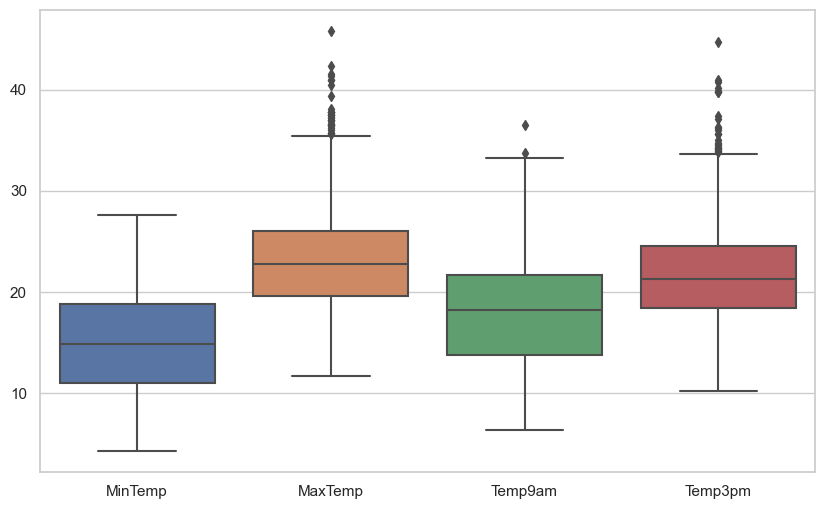

In [11]:
#check for outliers if need be using this code here
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sydney_processed[['MinTemp','MaxTemp','Temp9am','Temp3pm']])

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [12]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [13]:
df_sydney_processed = df_sydney_processed.astype(float)

In [14]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

#### Q1) Using `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [15]:
x_train, x_test, y_train, y_test =  train_test_split(features, Y, test_size=0.2, random_state=4)

#### Create and train your model using the training data (`x_train`, `y_train`).


In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression();
lr.fit(x_train,y_train);

#### Use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [17]:
predictions=lr.predict(x_test);

#### Using the `predictions` and the `y_test` dataframe Evaluate your model and cross validate your results

In [18]:
score = lr.score(x_test, y_test)
print(score)


0.8473282442748091


In [19]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[447  25]
 [ 75 108]]


In [20]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions)
recall

0.5901639344262295

In [21]:
mean_score = cross_val_score(lr, x_train, y_train, scoring="accuracy", cv = 5).mean()
print(mean_score)

0.8352509742676573


In [22]:
from sklearn.metrics import precision_score

In [23]:
lr1 = LogisticRegression(class_weight='balanced',random_state=0)
lr1.fit(x_train,y_train);

In [24]:
predictions1= lr1.predict(x_test)


In [25]:
import numpy
unique, counts = numpy.unique(predictions1, return_counts=True)
dict(zip(unique, counts))

{0.0: 416, 1.0: 239}

In [26]:
score = lr1.score(x_test, y_test)
print(score)


0.8015267175572519


In [27]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions1)
print(cf_matrix)

[[379  93]
 [ 37 146]]


In [28]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions1)
recall

0.7978142076502732

In [29]:
mean_score = cross_val_score(lr1, x_train, y_train, scoring="accuracy", cv = 7).mean()
print(mean_score)

0.7981769846617662


In [34]:
mean_score = cross_val_score(lr1, x_train, y_train, scoring="f1", cv = 10)
print(mean_score)
print(mean_score.mean())

[0.64596273 0.64327485 0.6835443  0.64473684 0.62420382 0.69565217
 0.64634146 0.64       0.65384615 0.72368421]
0.6601246555979354


In [31]:
mean_score = cross_val_score(lr1, x_train, y_train, scoring="accuracy", cv = 5)
print(mean_score)

[0.78435115 0.80114723 0.79732314 0.79349904 0.81070746]


#### Discuss your findings 

In [32]:
Our Problem was a Binary Class Problem
I choose Logistic Regression Because it is one of the MOst Popular Model for Binary Classification
After Traning the Model (Logistic Regression)
Such a model is not good you real world
We Got Accuray of 84 % which was quite Good but Our Recall Score was Not Good 59% Which means Majority of the Classes are missClassified
This is usually Caused when data is skewed ot Imbalanced 
to Solve the problem is used Weighted ("Balance") which will assign more weight to class with less data.
After this Our Accuray came down to 80 % but our Recall Score Jumped to 79 % 
which is better than Our previously Trained Model
mean Score of Model Also Decreased after using Balanced Weights

SyntaxError: invalid syntax (2048184515.py, line 1)